# Using SVM Classifier 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Reading and cleaning data

In [112]:
data = pd.read_csv(r"C:\Users\Aarushi Wagh\Downloads\code1\codes\isolation_forest_test_data.csv")
data.head()

data['label'] = data['label'].replace(['Inlier', 'Outlier'],(0,1))
data.head()

X = data[["app_cpu_apps.plugin_x","app_cpu_tc-qos-helper_x","app_cpu_ssh_x","running","used","cached","buffers"]].values
y = data['label'].values


### Visualizing the distribution of data

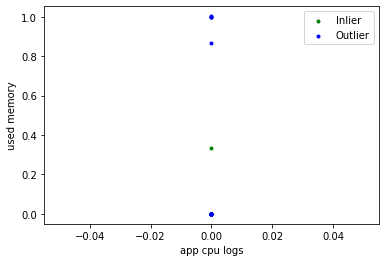

In [3]:
df0 = data[data.label==0]
df1 = data[data.label==1]
plt.scatter(df0["app_cpu_logs_x"][:10],df0["app_cpu_tc-qos-helper_x"][:10],color="green",marker=".",label="Inlier")
plt.scatter(df1["app_cpu_logs_x"][:10],df1["app_cpu_tc-qos-helper_x"][:10],color="blue",marker=".",label="Outlier")
plt.xlabel("app cpu logs")
plt.ylabel("used memory")
plt.legend()

### Splitting, oversampling and undersampling data

In [113]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size = 0.20, stratify=y)
oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_over, y_over = oversample.fit_resample(X_train_svc, y_train_svc)
#X_under, y_under = undersample.fit_resample(X_train_svc, y_train_svc)
X_both, y_both = undersample.fit_resample(X_over, y_over)
print(Counter(y_train_svc))
#print(Counter(y_under))
print(Counter(y_over))
print(Counter(y_both))

Counter({0: 3988, 1: 48})
Counter({0: 3988, 1: 1994})
Counter({0: 2492, 1: 1994})


### Performing GridSearch to select best parameters for the model

In [107]:
clf = RandomizedSearchCV(SVC(),{'C':[1,10], 'kernel':['rbf','linear']}, cv=3)

In [108]:
clf.fit(X_both,y_both.ravel())
df = pd.DataFrame(clf.cv_results_)

d:\python\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [109]:
print(df[['param_kernel','param_C','mean_test_score']])
print(clf.best_params_)

  param_kernel param_C  mean_test_score
0          rbf       1         0.847079
1       linear       1         0.859113
2          rbf      10         0.897236
3       linear      10         0.858444
{'kernel': 'rbf', 'C': 10}


### Training the model

In [114]:
data_model_svc = SVC(kernel="rbf",C=10)
data_model_svc.fit(X_both, y_both.ravel())
y_predicted_svc = data_model_svc.predict(X_test_svc)
print(data_model_svc.score(X_test_svc,y_test_svc))

0.996039603960396


### Performance metrics

In [115]:
report = classification_report(y_test_svc, y_predicted_svc)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       998
           1       0.90      0.75      0.82        12

    accuracy                           1.00      1010
   macro avg       0.95      0.87      0.91      1010
weighted avg       1.00      1.00      1.00      1010



In [116]:
print(confusion_matrix(y_test_svc, y_predicted_svc))
print(precision_score(y_test_svc, y_predicted_svc))
print(recall_score(y_test_svc, y_predicted_svc))
print(f1_score(y_test_svc, y_predicted_svc))

[[997   1]
 [  3   9]]
0.9
0.75
0.8181818181818182


### Visualizing the results of the model by plotting predicted values and actual values

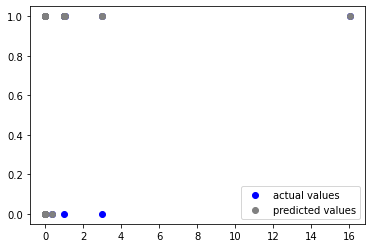

In [82]:
plt.scatter(X_test_svc[:,2], y_test_svc, color="blue", label="actual values")
plt.scatter(X_test_svc[:,2], y_predicted_svc, color="grey", label="predicted values")
plt.legend()

# Using Naive Bayes Classifier

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Reading and cleaning data

In [2]:
data = pd.read_csv(r"C:\Users\Aarushi Wagh\Downloads\code1\codes\isolation_forest_test_data.csv")
data.head()

data['label'] = data['label'].replace(['Inlier', 'Outlier'],(0,1))
data.head()

X = data[["app_cpu_apps.plugin_x","app_cpu_tc-qos-helper_x","app_cpu_ssh_x","running","free","used","cached","buffers"]].values
y = data['label'].values

### Splitting, oversampling and undersampling data

In [3]:
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, y,test_size = 0.25, stratify=y)
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train_gnb, y_train_gnb)
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_both, y_both = undersample.fit_resample(X_over, y_over)

print(Counter(y_train_gnb))
print(Counter(y_over))
print(Counter(y_both))

Counter({0: 3739, 1: 45})
Counter({0: 3739, 1: 1869})
Counter({0: 2336, 1: 1869})


### Performing GridSearch to select best parameters for the model

In [15]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
clf = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy')
clf.fit(X_both,y_both)
clf.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1.519911082952933e-07}

### Training the model

In [14]:
data_model_gnb = GaussianNB(var_smoothing = 8.111308307896872e-07)
data_model_gnb.fit(X_both, y_both.ravel())
y_predicted_gnb = data_model_gnb.predict(X_test_gnb)

### Performance metrics

In [16]:
a = cross_val_score(data_model_gnb, X_both, y_both.ravel(), cv = 10, scoring = "accuracy")
print(a)
print(a.mean())

[0.91686461 0.89073634 0.90498812 0.9239905  0.9216152  0.8952381
 0.92142857 0.91904762 0.89047619 0.92142857]
0.910581382196584


In [17]:
print(classification_report(y_test_gnb, y_predicted_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1247
           1       0.85      0.73      0.79        15

    accuracy                           1.00      1262
   macro avg       0.92      0.87      0.89      1262
weighted avg       1.00      1.00      1.00      1262



In [18]:
print(confusion_matrix(y_test_gnb, y_predicted_gnb))
print(precision_score(y_test_gnb, y_predicted_gnb))
print(recall_score(y_test_gnb, y_predicted_gnb))
print(f1_score(y_test_gnb, y_predicted_gnb))

[[1245    2]
 [   4   11]]
0.8461538461538461
0.7333333333333333
0.7857142857142856


### Visualizing the results of the model by plotting predicted values and actual values

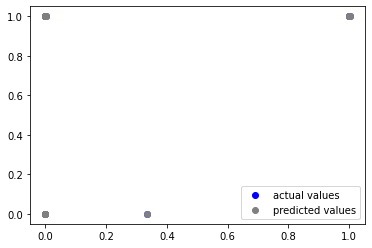

In [19]:
plt.scatter(X_test_gnb[:,2], y_test_gnb, color="blue", label="actual values")
plt.scatter(X_test_gnb[:,2], y_predicted_gnb, color="grey", label="predicted values")
plt.legend()

# Using Decision tree classification technique

### Importing libraries

In [79]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Reading and cleaning data

In [111]:
data = pd.read_csv(r"C:\Users\Aarushi Wagh\Downloads\code1\codes\isolation_forest_test_data.csv")
data.tail()

,time,app_cpu_netdata_x,app_cpu_apps.plugin_x,app_cpu_tc-qos-helper_x,app_cpu_go.d.plugin_x,app_cpu_logs_x,app_cpu_ssh_x,app_cpu_time_x,app_cpu_cron_x,app_cpu_system_x,...,pgio_out,running,blocked,free,used,cached,buffers,uptime,anomaly_score,label
5041,17-08-2019 04:11,0.0000,0.9993,1.9986,0.0,0.0,0.9993,0,0,0.0,...,0.0,3,0,13897.359,397.0898,681.0234,54.78906,62084.0,-0.290622,Outlier
5042,17-08-2019 04:13,0.9986,0.9997,0.0000,0.0,0.0,0.9998,0,0,0.0,...,0.0,4,0,13962.949,331.4453,681.0586,54.80859,62158.0,-0.290622,Outlier
5043,17-08-2019 04:13,1.9980,0.9991,0.9991,0.0,0.0,0.0001,0,0,0.0,...,0.0,6,0,13935.891,358.5195,681.0430,54.80859,62161.0,-0.299818,Outlier
5044,17-08-2019 04:14,0.0000,1.0001,1.0001,0.0,0.0,0.0002,0,0,0.0,...,0.0,5,0,13641.918,652.4609,681.0547,54.82812,62227.0,-0.309119,Outlier
5045,17-08-2019 04:29,0.9989,0.9991,1.9982,0.0,0.0,0.0001,0,0,0.0,...,0.0,6,0,13810.113,439.7070,725.4258,55.01562,63155.0,-0.299818,Outlier


In [227]:
data['label'] = data['label'].replace(['Inlier', 'Outlier'],(0,1))
data.head()
X = data[["app_cpu_netdata_x","app_cpu_apps.plugin_x","app_cpu_tc-qos-helper_x","app_cpu_ssh_x","running","free","used","cached","buffers"]].values
y = data[['label']].values



### Splitting, oversampling and undersampling data

In [228]:
X_train_dtrees, X_test_dtrees, y_train_dtrees, y_test_dtrees = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train_dtrees, y_train_dtrees)
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_both, y_both = undersample.fit_resample(X_over, y_over)

print(Counter(y_train_dtrees.ravel()))
print(Counter(y_over))
print(Counter(y_both))



Counter({0: 3739, 1: 45})
Counter({0: 3739, 1: 1869})
Counter({0: 2336, 1: 1869})


### Performing GridSearch to select best parameters for the model

In [199]:
clf = GridSearchCV(DecisionTreeClassifier(),{'criterion':['gini','entropy'],'min_samples_split':[10,20,30,40]})
clf.fit(X_both, y_both)
df = pd.DataFrame(clf.cv_results_)
#print(df[['param_criterion','param_min_samples_split','mean_test_score']])
clf.best_params_

{'criterion': 'gini', 'min_samples_split': 30}

### Training the model

In [229]:
data_model_dtrees = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30)
data_model_dtrees.fit(X_both, y_both)
y_predicted_dtrees = data_model_dtrees.predict(X_test_dtrees)

### Performance metrics

In [230]:
a = cross_val_score(data_model_dtrees, X_both, y_both, cv = 3, scoring = "accuracy")
print(a)
print(a.mean())

[0.9957204  0.99714693 0.99643112]
0.9964328176701446


In [231]:
print(classification_report(y_test_dtrees, y_predicted_dtrees))
print(confusion_matrix(y_test_dtrees, y_predicted_dtrees))
print(precision_score(y_test_dtrees, y_predicted_dtrees))
print(recall_score(y_test_dtrees, y_predicted_dtrees))
print(f1_score(y_test_dtrees, y_predicted_dtrees))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1247
           1       0.91      0.67      0.77        15

    accuracy                           1.00      1262
   macro avg       0.95      0.83      0.88      1262
weighted avg       0.99      1.00      0.99      1262

[[1246    1]
 [   5   10]]
0.9090909090909091
0.6666666666666666
0.7692307692307692


In [45]:
y_predicted_dtrees.shape

(1262,)

### Visualizing the results of the model by plotting predicted values and actual values

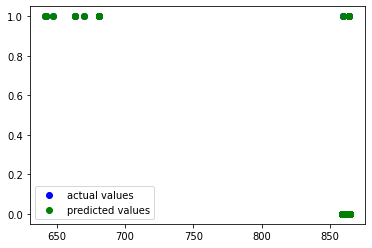

In [9]:
plt.scatter(X_test_dtrees[:,3], y_test_dtrees, color="blue", label="actual values")
plt.scatter(X_test_dtrees[:,3], y_predicted_dtrees, color="green", label="predicted values")
plt.legend()

# Using Random forest classification technique

### Splitting, oversampling and undersampling data

In [232]:
X_train_rforest, X_test_rforest, y_train_rforest, y_test_rforest = train_test_split(X, y.ravel(), test_size = 0.25, random_state=0,stratify = y)
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over_rf, y_over_rf = oversample.fit_resample(X_train_rforest, y_train_rforest)
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_both_rf, y_both_rf = undersample.fit_resample(X_over_rf, y_over_rf)

print(Counter(y_train_rforest.ravel()))
print(Counter(y_over_rf))
print(Counter(y_both_rf))


Counter({0: 3739, 1: 45})
Counter({0: 3739, 1: 1869})
Counter({0: 2336, 1: 1869})


### Performing GridSearch to select best parameters for the model

In [210]:
clf_rf = GridSearchCV(RandomForestClassifier(),{'criterion':['gini','entropy'],'n_estimators':[5,10,20,30,40]})
clf_rf.fit(X_both, y_both.ravel())
df = pd.DataFrame(clf_rf.cv_results_)
#print(df[['param_criterion','param_n_estimators','mean_test_score']])
clf_rf.best_params_

{'criterion': 'gini', 'n_estimators': 10}

### Training the model

In [233]:
data_model_rforest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10)
data_model_rforest.fit(X_both_rf, y_both_rf)
y_predicted_rforest = data_model_rforest.predict(X_test_rforest)
#print("mse= ", mean_squared_error(y_test_rforest, y_predicted_rforest))

### Performance metrics

In [234]:
b = cross_val_score(data_model_rforest, X_both_rf, y_both_rf, cv = 3, scoring = "accuracy")
print(b)
print(b.mean())

[0.9978602 1.        1.       ]
0.9992867332382311


In [235]:
print(classification_report(y_test_rforest, y_predicted_rforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1247
           1       0.92      0.73      0.81        15

    accuracy                           1.00      1262
   macro avg       0.96      0.87      0.91      1262
weighted avg       1.00      1.00      1.00      1262



In [236]:
print(confusion_matrix(y_test_rforest, y_predicted_rforest))
print(precision_score(y_test_rforest, y_predicted_rforest))
print(recall_score(y_test_rforest, y_predicted_rforest))
print(f1_score(y_test_rforest, y_predicted_rforest))

[[1246    1]
 [   4   11]]
0.9166666666666666
0.7333333333333333
0.8148148148148148


### Visualizing the results of the model by plotting predicted values and actual values

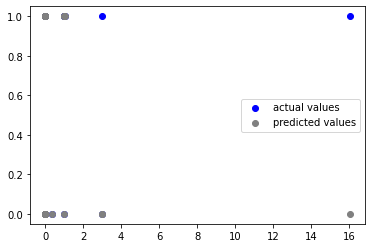

In [237]:
plt.scatter(X_test_rforest[:,3], y_test_rforest, color="blue", label="actual values")
plt.scatter(X_test_rforest[:,3], y_predicted_rforest, color="grey", label="predicted values")
plt.legend()

# Using Multi-Layer Perceptron Classifier 

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Reading and cleaning data

In [4]:
data = pd.read_csv(r"C:\Users\Aarushi Wagh\Downloads\code1\codes\isolation_forest_test_data.csv")
data.head()

data['label'] = data['label'].replace(['Inlier', 'Outlier'],(0,1))
data.head()

X = data[["app_cpu_apps.plugin_x","app_cpu_tc-qos-helper_x","app_cpu_ssh_x","running","used","cached","buffers"]].values
y = data['label'].values

### Splitting, oversampling and undersampling data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state=1)
oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_over, y_over = oversample.fit_resample(X_train, y_train)
#X_under, y_under = undersample.fit_resample(X_train_svc, y_train_svc)
X_both, y_both = undersample.fit_resample(X_over, y_over)
print(Counter(y_train))
#print(Counter(y_under))
print(Counter(y_over))
print(Counter(y_both))

Counter({0: 3988, 1: 48})
Counter({0: 3988, 1: 1994})
Counter({0: 2492, 1: 1994})


### Performing GridSearch to select best parameters for the model

In [7]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp_clf, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='tanh',
                                     hidden_layer_sizes=(50, 50, 50),
                                     max_iter=100),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [8]:
print(clf.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


### Training the model

In [11]:
mlp_clf = MLPClassifier(max_iter=100, activation='relu', alpha=0.0001, hidden_layer_sizes=(50,100,50), learning_rate='constant', solver='adam')
mlp_clf.fit(X_both, y_both)
y_predicted = mlp_clf.predict(X_test)
print(mlp_clf.score(X_test,y_test))

0.996039603960396


### Performance metrics

In [12]:
report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       998
           1       0.90      0.75      0.82        12

    accuracy                           1.00      1010
   macro avg       0.95      0.87      0.91      1010
weighted avg       1.00      1.00      1.00      1010



In [13]:
print(confusion_matrix(y_test, y_predicted))
print(precision_score(y_test, y_predicted))
print(recall_score(y_test, y_predicted))
print(f1_score(y_test, y_predicted))

[[997   1]
 [  3   9]]
0.9
0.75
0.8181818181818182


# Visualizing performance of various models and performing weighted average method as an ensemble of all our models

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

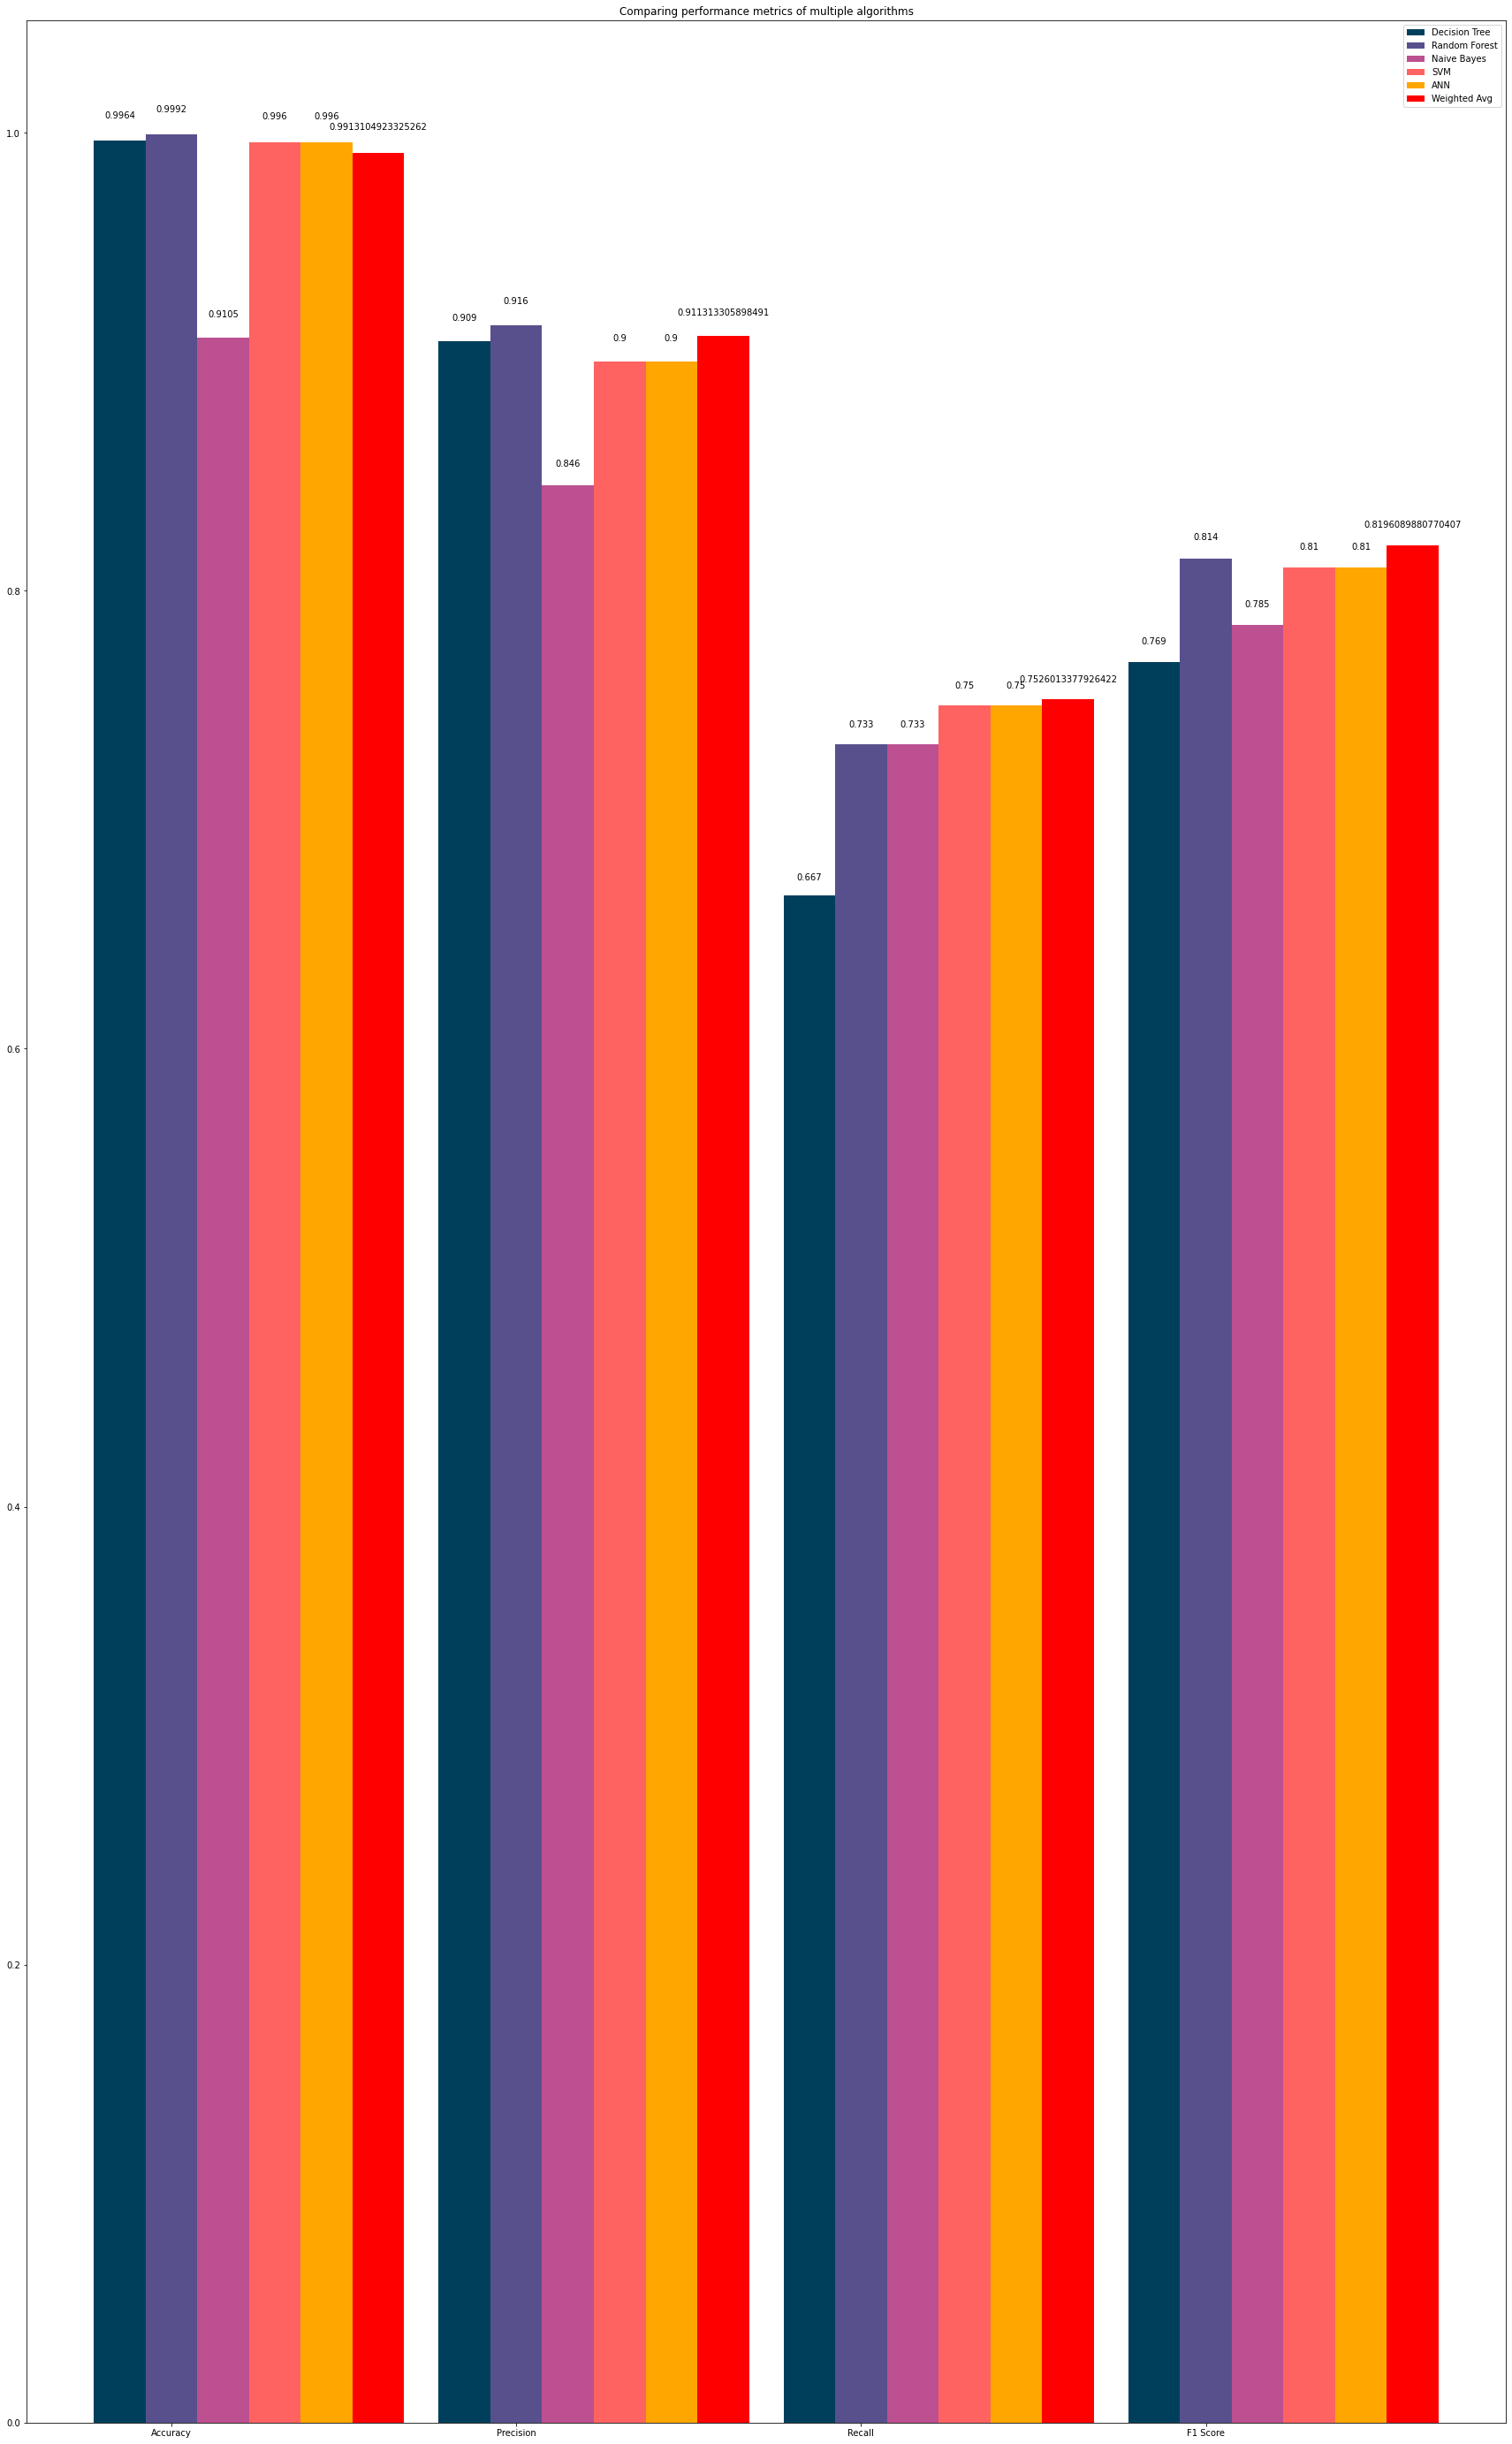

In [4]:
barWidth = 0.15
fig = plt.subplots(figsize =(30, 50))

def text(x,y):
    for i in range(len(y)):
        plt.text(x[i],y[i]*1.01,y[i], ha = 'center')
        
Decision_tree = [0.9964,0.909,0.667,0.769]
Random_forest = [0.9992,0.916,0.733,0.814]
Naive_bayes = [0.9105,0.846,0.733,0.785]
SVM = [0.9960,0.9,0.75,0.81]
ANN = [0.9960,0.9,0.75,0.81]

algo_output = [[0.9964,0.909,0.667,0.769],
               [0.9992,0.916,0.733,0.814],
               #[0.9105,0.846,0.733,0.785],
               #[0.9960,0.9,0.75,0.81],
               [0.9960,0.9,0.75,0.81],
               [0.9732,0.92,0.84,0.878]]#xgboost

weighted_avg = []
for i in range(4):
    sum=0
    for j in range(4):
        sum += algo_output[j][i]
    aver = 0
    for k in range(4):
        aver += (algo_output[k][i]**2)/sum
    weighted_avg.append(aver)
#print(weighted_avg)


br1 = np.arange(len(Decision_tree))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

br6 = [x + barWidth for x in br5]

plt.bar(br1, Decision_tree, color ='#003f5c', width = barWidth, label ='Decision Tree')
text(br1,Decision_tree)

plt.bar(br2, Random_forest, color ='#58508d', width = barWidth, label ='Random Forest')
text(br2,Random_forest)

plt.bar(br3, Naive_bayes, color ='#bc5090', width = barWidth, label ='Naive Bayes')
text(br3,Naive_bayes)

plt.bar(br4, SVM, color ='#ff6361', width = barWidth, label ='SVM')
text(br4,SVM)

plt.bar(br5, ANN, color ='#ffa600', width = barWidth, label ='ANN')
text(br5,ANN)

plt.bar(br6, weighted_avg, color ='red', width = barWidth, label ='Weighted Avg')
text(br6,weighted_avg)

plt.xticks([r + barWidth for r in range(len(Decision_tree))],
        ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

plt.title("Comparing performance metrics of multiple algorithms")
plt.legend()

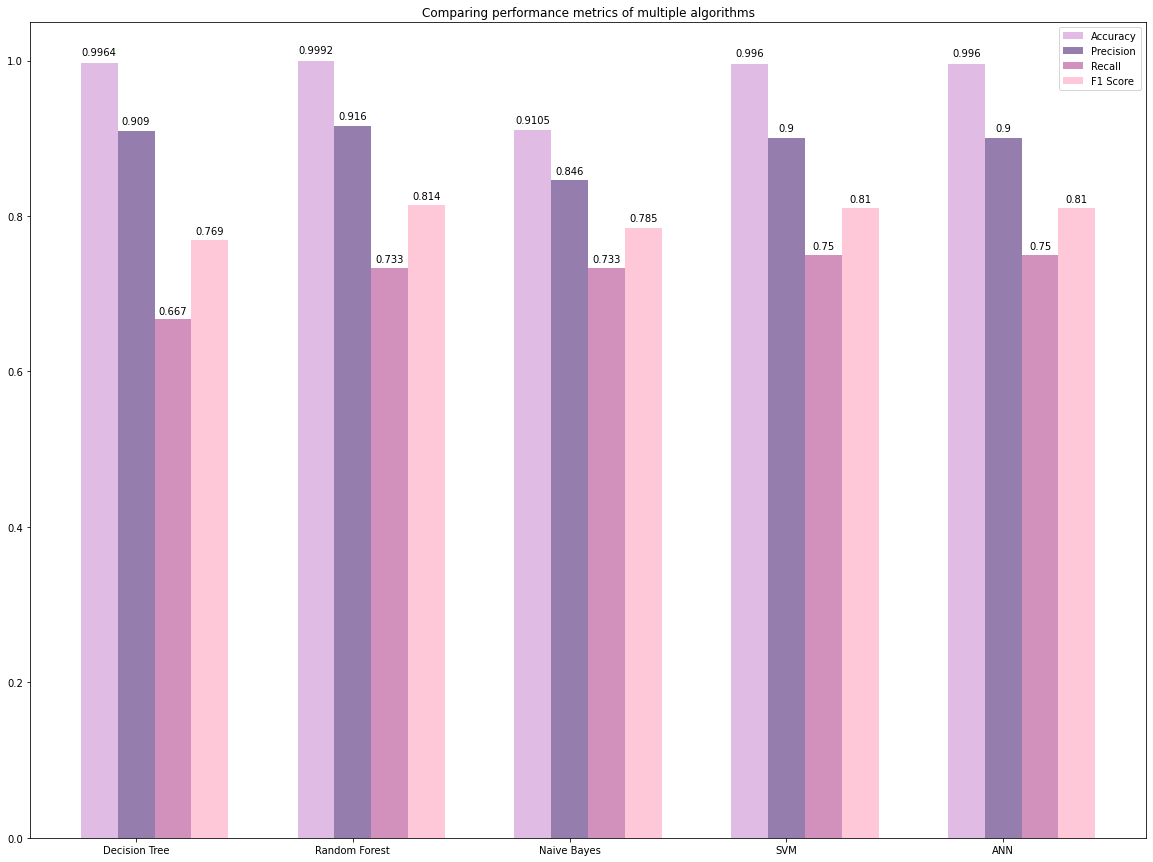

In [4]:
barWidth = 0.17
fig = plt.subplots(figsize =(20, 15))

def text(x,y):
    for i in range(len(y)):
        plt.text(x[i],y[i]*1.01,y[i], ha = 'center')
        
Accuracy = [0.9964,0.9992,0.9105,0.9960,0.9960]
Precision = [0.909,0.916,0.846,0.9,0.9]
Recall = [0.667,0.733,0.733,0.75,0.75]
F1_Score = [0.769,0.814,0.785,0.81,0.81]

br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


plt.bar(br1, Accuracy, color ='#E0BBE4', width = barWidth, label ='Accuracy')
text(br1,Accuracy)

plt.bar(br2, Precision, color ='#957DAD', width = barWidth, label ='Precision')
text(br2,Precision)

plt.bar(br3, Recall, color ='#D291BC', width = barWidth, label ='Recall')
text(br3,Recall)

plt.bar(br4, F1_Score, color ='#FEC8D8', width = barWidth, label ='F1 Score')
text(br4,F1_Score)


plt.xticks([r + barWidth for r in range(len(F1_Score))],
        ['Decision Tree', 'Random Forest', "Naive Bayes", 'SVM', 'ANN'])

plt.title("Comparing performance metrics of multiple algorithms")
plt.legend()